In [2]:
import numpy as np

class KMeansFromScratch:
    """
    K-Means Clustering Algorithm implemented from scratch.

    Parameters:
    -----------
    n_clusters: int
        The number of clusters to form.
    max_iters: int
        Maximum number of iterations to run the algorithm for if it does not converge.
    """
    def __init__(self, n_clusters=2, max_iters=500):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def _initialize_centroids(self, data):
        """ Randomly choose initial centroids from data points """
        n_samples, n_features = data.shape
        centroids = data[np.random.choice(n_samples, self.n_clusters, replace=False)]
        return centroids

    def _compute_distance(self, point1, point2):
        """ Calculate Euclidean distance between two points """
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _find_closest_centroid(self, sample, centroids):
        """ Find the closest centroid to the sample """
        distances = [self._compute_distance(sample, centroid) for centroid in centroids]
        return np.argmin(distances)

    def _create_clusters(self, centroids, data):
        """ Assign each sample to the nearest centroid to form clusters """
        clusters = [[] for _ in range(self.n_clusters)]
        for idx, sample in enumerate(data):
            centroid_idx = self._find_closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _calculate_new_centroids(self, clusters, data):
        """ Compute the new centroids as the mean of samples in each cluster """
        centroids = np.zeros((self.n_clusters, data.shape[1]))
        for idx, cluster in enumerate(clusters):
            if cluster:
                centroids[idx] = np.mean(data[cluster], axis=0)
        return centroids

    def _get_labels(self, clusters, data):
        """ Assign labels based on cluster index for each sample """
        labels = np.zeros(data.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def fit_predict(self, data):
        """ Run K-Means algorithm to fit and predict cluster labels for data """
        centroids = self._initialize_centroids(data)

        for _ in range(self.max_iters):
            clusters = self._create_clusters(centroids, data)
            new_centroids = self._calculate_new_centroids(clusters, data)

            # Check if centroids have changed; if not, convergence achieved
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

        return self._get_labels(clusters, data)


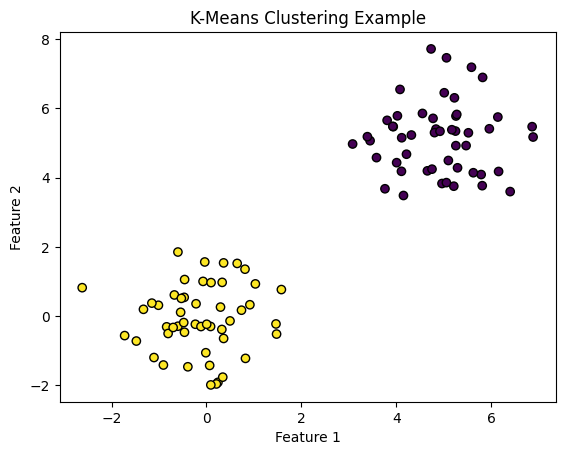

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with two clusters
np.random.seed(42)
data1 = np.random.normal(0, 1, (50, 2))
data2 = np.random.normal(5, 1, (50, 2))
data = np.vstack((data1, data2))

# Instantiate and run KMeansFromScratch
kmeans = KMeansFromScratch(n_clusters=2, max_iters=100)
labels = kmeans.fit_predict(data)

# Plot the clustered data
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title("K-Means Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
